<a href="https://colab.research.google.com/github/FahmidaNourin/Light_Sleep_And_Deep_Sleep_Classification/blob/main/Project_Initial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#connecting with drive

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#read in csv file

In [137]:
import numpy as np
import pandas as pd


df = pd.read_csv("/content/drive/MyDrive/Sleep_Research/HMC_Sleep_Stages_75_Subject.csv")

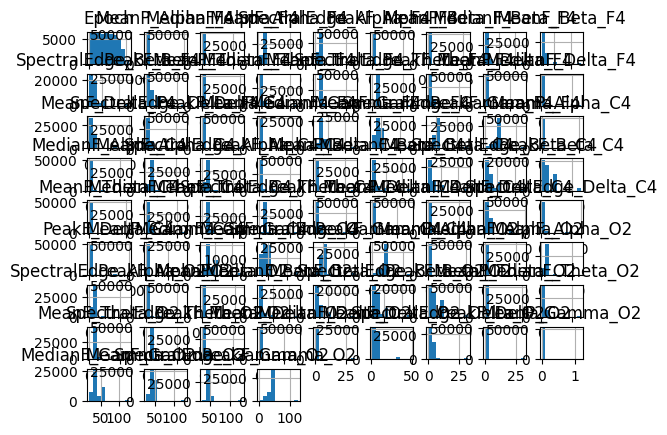

In [139]:
from matplotlib import pyplot
from pandas import read_csv

df.hist()
pyplot.show()

<ipython-input-141-e37aa941d13f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_Sleep_Stage = df.corr()


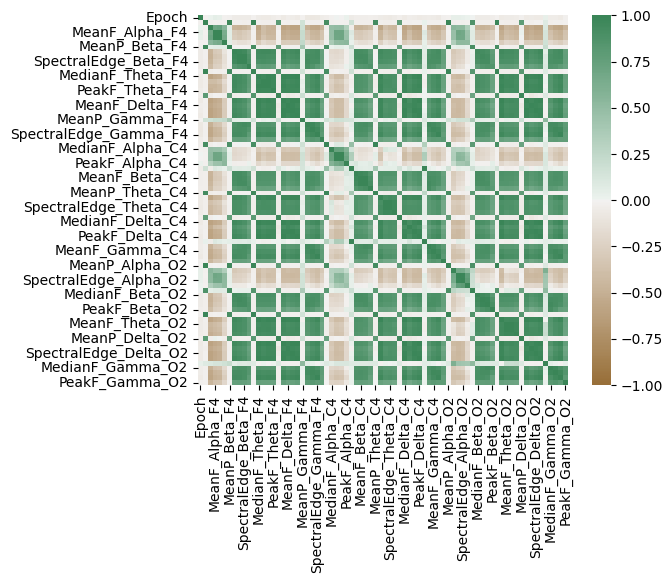

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_Sleep_Stage = df.corr()

axis_corr = sns.heatmap(
correlation_Sleep_Stage,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

In [133]:
df.head()

,Subject,Sleep_Stage,Epoch,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,SpectralEdge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,SpectralEdge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,SpectralEdge_Gamma_O2,PeakF_Gamma_O2
0,SN002,N1,6,0.00034,10.11512,17.85756,17.48293,10.24000,0.00047,17.73268,...,0.00112,0.74927,6.36878,2.87220,0.62439,0.000076,32.71805,43.83220,49.95122,49.95122
1,SN002,N2,787,0.00064,10.61463,13.73659,13.48683,10.73951,0.00049,12.73756,...,0.00149,1.87317,6.61854,4.24585,0.74927,0.000029,24.72585,35.21561,46.70439,49.95122
2,SN002,N2,788,0.00054,10.73951,14.48585,13.98634,11.48878,0.00045,12.86244,...,0.00173,1.62341,5.99415,3.62146,0.74927,0.000028,24.72585,35.21561,46.32976,49.95122
3,SN002,N2,789,0.00059,9.99024,14.73561,14.23610,11.36390,0.00048,13.36195,...,0.00207,0.99902,6.36878,3.24683,0.74927,0.000031,23.85171,35.09073,45.08098,49.95122
4,SN002,N2,791,0.00029,9.24098,16.85854,16.10927,7.86732,0.00029,15.85951,...,0.00119,1.62341,6.24390,3.87122,0.74927,0.000032,25.47512,35.59024,46.57951,49.95122


In [135]:
df.isnull().sum()

Subject                  0
Sleep_Stage              0
Epoch                    0
MeanP_Alpha_F4           0
MedianF_Alpha_F4         0
                        ..
MeanP_Gamma_O2           0
MedianF_Gamma_O2         0
MeanF_Gamma_O2           0
SpectralEdge_Gamma_O2    0
PeakF_Gamma_O2           0
Length: 78, dtype: int64

In [136]:
df = df.dropna().reset_index(drop=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51131 entries, 0 to 51130
Data columns (total 78 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Subject                51131 non-null  object 
 1   Sleep_Stage            51131 non-null  object 
 2   Epoch                  51131 non-null  int64  
 3   MeanP_Alpha_F4         51131 non-null  float64
 4   MedianF_Alpha_F4       51131 non-null  float64
 5   MeanF_Alpha_F4         51131 non-null  float64
 6   SpectralEdge_Alpha_F4  51131 non-null  float64
 7   PeakF_Alpha_F4         51131 non-null  float64
 8   MeanP_Beta_F4          51131 non-null  float64
 9   MedianF_Beta_F4        51131 non-null  float64
 10  MeanF_Beta_F4          51131 non-null  float64
 11  SpectralEdge_Beta_F4   51131 non-null  float64
 12  PeakF_Beta_F4          51131 non-null  float64
 13  MeanP_Theta_F4         51131 non-null  float64
 14  MedianF_Theta_F4       51131 non-null  float64
 15  Me

In [96]:
df.shape

(51131, 78)

#Converting N1,N2 -> Light_Sleep, N3 -> Deep_Sleep And removing W stage.

In [97]:
df =df.replace("N1", "Light_Sleep")
df =df.replace("N2", "Light_Sleep")
df =df.replace("N3", "Deep_Sleep")
df.drop(df.index[df['Sleep_Stage'] == "R"], inplace = True)
df.drop(df.index[df['Sleep_Stage'] == "W"], inplace = True)


In [98]:
df.head()

,Subject,Sleep_Stage,Epoch,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,SpectralEdge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,SpectralEdge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,SpectralEdge_Gamma_O2,PeakF_Gamma_O2
0,SN002,Light_Sleep,6,0.00034,10.11512,17.85756,17.48293,10.24000,0.00047,17.73268,...,0.00112,0.74927,6.36878,2.87220,0.62439,0.000076,32.71805,43.83220,49.95122,49.95122
1,SN002,Light_Sleep,787,0.00064,10.61463,13.73659,13.48683,10.73951,0.00049,12.73756,...,0.00149,1.87317,6.61854,4.24585,0.74927,0.000029,24.72585,35.21561,46.70439,49.95122
2,SN002,Light_Sleep,788,0.00054,10.73951,14.48585,13.98634,11.48878,0.00045,12.86244,...,0.00173,1.62341,5.99415,3.62146,0.74927,0.000028,24.72585,35.21561,46.32976,49.95122
3,SN002,Light_Sleep,789,0.00059,9.99024,14.73561,14.23610,11.36390,0.00048,13.36195,...,0.00207,0.99902,6.36878,3.24683,0.74927,0.000031,23.85171,35.09073,45.08098,49.95122
4,SN002,Light_Sleep,791,0.00029,9.24098,16.85854,16.10927,7.86732,0.00029,15.85951,...,0.00119,1.62341,6.24390,3.87122,0.74927,0.000032,25.47512,35.59024,46.57951,49.95122


In [99]:
df.shape

(33816, 78)

#Removing columns

In [100]:
df = df.loc[:,df.columns != "Subject"]
df = df.loc[:,df.columns != "Epoch"]


#Encoding target columns (Sleep Stage)

In [101]:
target="Sleep_Stage"

In [102]:
df[target].value_counts()

Light_Sleep    23954
Deep_Sleep      9862
Name: Sleep_Stage, dtype: int64

In [103]:
from sklearn.preprocessing import LabelEncoder
encd = LabelEncoder()

In [104]:
df[target] = encd.fit_transform(df[target])

In [105]:
df[target].value_counts()

1    23954
0     9862
Name: Sleep_Stage, dtype: int64

#Feature Selection: ANOVA

In [106]:
num_of_feat = 20

In [107]:

from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd

X = df.loc[:,df.columns != "Sleep_Stage"]
y = df["Sleep_Stage"]

fs = SelectKBest(score_func=f_classif, k=5)
fit = fs.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_ANOVA']

lyst = featureScores.nlargest(num_of_feat,'Score_ANOVA')
ANOVA_feature=list(lyst['Best_columns'])
ANOVA_feature


['SpectralEdge_Alpha_F4',
 'MeanF_Alpha_F4',
 'MedianF_Alpha_O2',
 'MeanF_Delta_C4',
 'SpectralEdge_Alpha_C4',
 'MeanF_Alpha_C4',
 'SpectralEdge_Beta_F4',
 'MeanF_Delta_F4',
 'MeanF_Delta_O2',
 'SpectralEdge_Alpha_O2',
 'SpectralEdge_Beta_C4',
 'MeanF_Alpha_O2',
 'PeakF_Beta_F4',
 'MeanF_Beta_F4',
 'MedianF_Alpha_F4',
 'SpectralEdge_Theta_O2',
 'MeanF_Theta_O2',
 'PeakF_Alpha_O2',
 'MedianF_Beta_F4',
 'SpectralEdge_Delta_C4']

#Pearson’s

In [108]:

from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import pandas as pd
X = df.loc[:,df.columns != "Sleep_Stage"]
y = df["Sleep_Stage"]
fs = SelectKBest(score_func=f_regression, k=5)
fit = fs.fit(X,y)

#create df for scores
dfscores = pd.DataFrame(fit.scores_)
#create df for column names
dfcolumns = pd.DataFrame(df.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Best_columns','Score_pearsons']

#print 10 best features
lyst = featureScores.nlargest(num_of_feat,'Score_pearsons')

PEARSON_feature=list(lyst['Best_columns'])
PEARSON_feature


['MeanF_Alpha_F4',
 'MedianF_Alpha_F4',
 'MeanP_Alpha_O2',
 'MedianF_Delta_C4',
 'MeanF_Alpha_C4',
 'MedianF_Alpha_C4',
 'MeanF_Beta_F4',
 'MedianF_Delta_F4',
 'MedianF_Delta_O2',
 'MeanF_Alpha_O2',
 'MeanF_Beta_C4',
 'MedianF_Alpha_O2',
 'SpectralEdge_Beta_F4',
 'MedianF_Beta_F4',
 'MeanP_Alpha_F4',
 'MeanF_Theta_O2',
 'MedianF_Theta_O2',
 'SpectralEdge_Alpha_O2',
 'MeanP_Beta_F4',
 'MeanF_Delta_C4']

#Univarient Feature Selection

In [109]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)


#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns



sorted_df = featureScores.sort_values(by=['Score'], ascending=False)
Univarient_feature = sorted_df["Specs"][:num_of_feat]
Univarient_feature

9             PeakF_Beta_F4
8      SpectralEdge_Beta_F4
6           MedianF_Beta_F4
34            PeakF_Beta_C4
33     SpectralEdge_Beta_C4
7             MeanF_Beta_F4
56          MedianF_Beta_O2
31          MedianF_Beta_C4
32            MeanF_Beta_C4
42           MeanF_Delta_C4
63    SpectralEdge_Theta_O2
58     SpectralEdge_Beta_O2
36         MedianF_Theta_C4
59            PeakF_Beta_O2
64           PeakF_Theta_O2
3     SpectralEdge_Alpha_F4
62           MeanF_Theta_O2
24           PeakF_Gamma_F4
17           MeanF_Delta_F4
57            MeanF_Beta_O2
Name: Specs, dtype: object

#Spliting Dataset into X(features) and y(target)

In [110]:
from scipy.stats import pearson3
#X = df.loc[:,df.columns != target]
#X = df.loc[:,ANOVA_feature]
#X = df.loc[:,Univarient_feature]
X = df.loc[:,PEARSON_feature]
y = df[target]




#Scaling Dataset

In [111]:
X

,MeanF_Alpha_F4,MedianF_Alpha_F4,MeanP_Alpha_O2,MedianF_Delta_C4,MeanF_Alpha_C4,MedianF_Alpha_C4,MeanF_Beta_F4,MedianF_Delta_F4,MedianF_Delta_O2,MeanF_Alpha_O2,MeanF_Beta_C4,MedianF_Alpha_O2,SpectralEdge_Beta_F4,MedianF_Beta_F4,MeanP_Alpha_F4,MeanF_Theta_O2,MedianF_Theta_O2,SpectralEdge_Alpha_O2,MeanP_Beta_F4,MeanF_Delta_C4
0,17.85756,10.11512,0.00023,0.87415,18.48195,9.86537,25.35024,0.74927,0.74927,18.48195,25.84976,10.61463,27.47317,17.73268,0.00034,12.98732,5.86927,17.98244,0.00047,6.74341
1,13.73659,10.61463,0.00044,1.24878,13.86146,10.73951,20.23024,1.12390,1.87317,14.73561,19.48098,8.99122,20.72976,12.73756,0.00064,10.86439,5.36976,13.86146,0.00049,5.36976
2,14.48585,10.73951,0.00034,0.99902,14.73561,10.86439,20.97951,1.12390,1.62341,15.73463,20.72976,9.36585,21.60390,12.86244,0.00054,11.86341,5.24488,14.73561,0.00045,5.36976
3,14.73561,9.99024,0.00042,1.12390,14.86049,10.24000,21.60390,1.24878,0.99902,15.36000,20.97951,9.11610,22.10341,13.36195,0.00059,11.73854,5.74439,14.86049,0.00048,5.36976
4,16.85854,9.24098,0.00029,1.49854,17.60780,9.61561,23.35220,1.37366,1.62341,16.60878,23.47707,9.24098,24.35122,15.85951,0.00029,11.48878,5.24488,15.98439,0.00029,6.11902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51126,13.48683,8.11707,0.00047,0.74927,13.98634,7.99220,20.35512,0.74927,0.62439,14.23610,20.72976,7.86732,20.48000,11.98829,0.00083,10.11512,4.99512,13.36195,0.00045,4.12098
51127,13.86146,7.99220,0.00051,0.74927,14.36098,8.11707,20.85463,0.87415,0.74927,13.98634,20.72976,7.86732,20.97951,12.23805,0.00076,9.74049,5.12000,13.23707,0.00042,4.49561
51128,13.73659,7.99220,0.00050,0.62439,14.11122,8.36683,20.10537,0.74927,0.62439,13.98634,20.48000,8.11707,20.48000,12.61268,0.00080,10.11512,5.12000,13.23707,0.00046,4.49561
51129,13.23707,8.61659,0.00054,0.87415,13.98634,8.24195,19.48098,0.87415,0.74927,13.98634,20.35512,7.61756,19.48098,11.73854,0.00093,9.74049,4.99512,13.11220,0.00052,4.37073


In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X[X.columns] =   scaler.transform(X)

In [113]:
X

,MeanF_Alpha_F4,MedianF_Alpha_F4,MeanP_Alpha_O2,MedianF_Delta_C4,MeanF_Alpha_C4,MedianF_Alpha_C4,MeanF_Beta_F4,MedianF_Delta_F4,MedianF_Delta_O2,MeanF_Alpha_O2,MeanF_Beta_C4,MedianF_Alpha_O2,SpectralEdge_Beta_F4,MedianF_Beta_F4,MeanP_Alpha_F4,MeanF_Theta_O2,MedianF_Theta_O2,SpectralEdge_Alpha_O2,MeanP_Beta_F4,MeanF_Delta_C4
0,0.694639,0.531944,-0.081423,-0.229571,0.473265,0.121523,-0.144084,-0.236310,-0.229271,0.531093,-0.188052,0.536957,-0.118691,-0.024308,-0.087169,0.036116,-0.139099,0.552605,-0.072132,0.028836
1,-0.196253,0.730330,-0.058008,-0.160002,-0.251260,0.293465,-0.410827,-0.166894,-0.021284,-0.101868,-0.505598,0.095942,-0.466199,-0.267097,-0.053941,-0.179873,-0.188022,-0.105519,-0.068800,-0.243852
2,-0.034275,0.779927,-0.069158,-0.206382,-0.114187,0.318028,-0.371791,-0.166894,-0.067505,0.066921,-0.443334,0.197714,-0.421152,-0.261027,-0.065017,-0.078232,-0.200253,0.034084,-0.075464,-0.243852
3,0.019720,0.482346,-0.060238,-0.183192,-0.094605,0.195212,-0.339262,-0.143755,-0.183053,0.003626,-0.430882,0.129867,-0.395411,-0.236748,-0.059479,-0.090936,-0.151330,0.054027,-0.070466,-0.243852
4,0.478665,0.184769,-0.074733,-0.113622,0.336192,0.072396,-0.248178,-0.120615,-0.067505,0.214612,-0.306354,0.163792,-0.279575,-0.115354,-0.092707,-0.116347,-0.200253,0.233515,-0.102122,-0.095114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51126,-0.250248,-0.261605,-0.054663,-0.252761,-0.231678,-0.246925,-0.404321,-0.236310,-0.252381,-0.186262,-0.443334,-0.209376,-0.479070,-0.303515,-0.032896,-0.256105,-0.224714,-0.185291,-0.075464,-0.491752
51127,-0.169258,-0.311198,-0.050203,-0.252761,-0.172932,-0.222363,-0.378297,-0.213171,-0.229271,-0.228460,-0.443334,-0.209376,-0.453329,-0.291375,-0.040649,-0.294220,-0.212483,-0.205234,-0.080463,-0.417383
51128,-0.196253,-0.311198,-0.051318,-0.275951,-0.212096,-0.173236,-0.417333,-0.236310,-0.252381,-0.228460,-0.455787,-0.141529,-0.479070,-0.273166,-0.036219,-0.256105,-0.212483,-0.205234,-0.073798,-0.417383
51129,-0.304242,-0.063214,-0.046858,-0.229571,-0.231678,-0.197800,-0.449862,-0.213171,-0.229271,-0.228460,-0.462014,-0.277225,-0.530552,-0.315654,-0.021820,-0.294220,-0.224714,-0.225176,-0.063802,-0.442173


#Spliting X and y to train and test sets

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [115]:
y_train.value_counts()

1    19176
0     7876
Name: Sleep_Stage, dtype: int64

#Oversampling using SMOTE

**<font color='red'>SNB:</font><font color='olive'> We used *SMOTE* in train data only, so that our test data can remain corrupted data free. The accurecy of the model will be counted only for actual data.</font>**

In [116]:
!pip install imbalanced-learn

In [117]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train,y_train = smote.fit_resample(X_train,y_train)

In [118]:
y_train.value_counts()

1    19176
0    19176
Name: Sleep_Stage, dtype: int64

In [119]:
y_test.value_counts()

1    4778
0    1986
Name: Sleep_Stage, dtype: int64

#RandomForest

In [120]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

CPU times: user 15.5 s, sys: 41.3 ms, total: 15.6 s
Wall time: 22.9 s


In [121]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[1617  369]
 [ 331 4447]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1986
           1       0.92      0.93      0.93      4778

    accuracy                           0.90      6764
   macro avg       0.88      0.87      0.87      6764
weighted avg       0.90      0.90      0.90      6764

Accurecy:  0.8965109402720284


#AdaBoost

In [122]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

In [123]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[1571  415]
 [ 660 4118]]
              precision    recall  f1-score   support

           0       0.70      0.79      0.75      1986
           1       0.91      0.86      0.88      4778

    accuracy                           0.84      6764
   macro avg       0.81      0.83      0.81      6764
weighted avg       0.85      0.84      0.84      6764

Accurecy:  0.841070372560615


#Gradient_Boosting

In [124]:
from sklearn.ensemble import GradientBoostingClassifier
grd = GradientBoostingClassifier()
grd.fit(X_train, y_train)
y_pred = grd.predict(X_test)

In [125]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[1600  386]
 [ 512 4266]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      1986
           1       0.92      0.89      0.90      4778

    accuracy                           0.87      6764
   macro avg       0.84      0.85      0.84      6764
weighted avg       0.87      0.87      0.87      6764

Accurecy:  0.8672383205204022


#XGBOOSTING


In [126]:
from xgboost import XGBClassifier

In [127]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [128]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[1610  376]
 [ 296 4482]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1986
           1       0.92      0.94      0.93      4778

    accuracy                           0.90      6764
   macro avg       0.88      0.87      0.88      6764
weighted avg       0.90      0.90      0.90      6764

Accurecy:  0.9006505026611472
